## Predict whether or not the customer will make a fixed deposit

In [1]:
import numpy as np
import pandas as pd


#Import the data and sort the columns
df1 = pd.read_csv('bank_dataset.csv', delimiter = ';')

In [2]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
#look for any null values
df1.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
#create a new dataset to save
df1 . to_csv("bank-full-dataset.csv", index=False)

In [6]:
dfn = pd.read_csv('bank-full-dataset.csv')

In [7]:
dfn

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Clean the dataset

In [8]:
#remove columns with an excessive number of 'unknown' values.
#drop the phone call and poutcome

dfn.drop(['contact', 'poutcome'], axis='columns', inplace=True)

In [9]:
#the top 7 features were chosen after filtering based feature selection in Azure Machine Learning Studio
#columns that aren't essential should be removed

dfn.drop([ 'marital', 'education', 'default', 'balance', 'loan', 'day', 'campaign'], axis='columns', inplace=True)

In [10]:
dfn

,age,job,housing,month,duration,pdays,previous,y
0,58,management,yes,may,261,-1,0,no
1,44,technician,yes,may,151,-1,0,no
2,33,entrepreneur,yes,may,76,-1,0,no
3,47,blue-collar,yes,may,92,-1,0,no
4,33,unknown,no,may,198,-1,0,no
...,...,...,...,...,...,...,...,...
45206,51,technician,no,nov,977,-1,0,yes
45207,71,retired,no,nov,456,-1,0,yes
45208,72,retired,no,nov,1127,184,3,yes
45209,57,blue-collar,no,nov,508,-1,0,no


In [11]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   job       45211 non-null  object
 2   housing   45211 non-null  object
 3   month     45211 non-null  object
 4   duration  45211 non-null  int64 
 5   pdays     45211 non-null  int64 
 6   previous  45211 non-null  int64 
 7   y         45211 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.8+ MB


In [12]:
#alter the name of the prediction column

dfn.rename(columns={'y':'ifCreatedAccount'},inplace=True)
dfn

,age,job,housing,month,duration,pdays,previous,ifCreatedAccount
0,58,management,yes,may,261,-1,0,no
1,44,technician,yes,may,151,-1,0,no
2,33,entrepreneur,yes,may,76,-1,0,no
3,47,blue-collar,yes,may,92,-1,0,no
4,33,unknown,no,may,198,-1,0,no
...,...,...,...,...,...,...,...,...
45206,51,technician,no,nov,977,-1,0,yes
45207,71,retired,no,nov,456,-1,0,yes
45208,72,retired,no,nov,1127,184,3,yes
45209,57,blue-collar,no,nov,508,-1,0,no


In [13]:
dfn.describe()

,age,duration,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,258.163080,40.197828,0.580323
std,10.618762,257.527812,100.128746,2.303441
min,18.000000,0.000000,-1.000000,0.000000
25%,33.000000,103.000000,-1.000000,0.000000
50%,39.000000,180.000000,-1.000000,0.000000
75%,48.000000,319.000000,-1.000000,0.000000
max,95.000000,4918.000000,871.000000,275.000000


In [14]:
#change yes = 1 no = 0
#from 1 to 12, assign a value to each job and each month

dfn['ifCreatedAccount'] = dfn['ifCreatedAccount'].map({'yes': 1, 'no': 0})
dfn['month'] = dfn['month'].map({'jan': 1, 'feb': 2,'mar':3,'apr': 4,'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9,'oct':10,'nov': 11,'dec': 12})
dfn['housing'] = dfn['housing'].map({'yes': 1, 'no': 0})
dfn['job'] = dfn['job'].map({'blue-collar': 1, 'management': 2,'technician':3,'admin.': 4,'services': 5, 'retired': 6, 'self-employed': 7, 'entrepreneur': 8, 'unemployed': 9,'housemaid':10,'student': 11,'unknown': 12})

dfn

,age,job,housing,month,duration,pdays,previous,ifCreatedAccount
0,58,2,1,5,261,-1,0,0
1,44,3,1,5,151,-1,0,0
2,33,8,1,5,76,-1,0,0
3,47,1,1,5,92,-1,0,0
4,33,12,0,5,198,-1,0,0
...,...,...,...,...,...,...,...,...
45206,51,3,0,11,977,-1,0,1
45207,71,6,0,11,456,-1,0,1
45208,72,6,0,11,1127,184,3,1
45209,57,1,0,11,508,-1,0,0


In [15]:
#after cleansing the dataset

dfn . to_csv("cleanedBankDataset.csv", index=False)

In [16]:
dataframe = pd.read_csv('cleanedBankDataset.csv')
dataframe

,age,job,housing,month,duration,pdays,previous,ifCreatedAccount
0,58,2,1,5,261,-1,0,0
1,44,3,1,5,151,-1,0,0
2,33,8,1,5,76,-1,0,0
3,47,1,1,5,92,-1,0,0
4,33,12,0,5,198,-1,0,0
...,...,...,...,...,...,...,...,...
45206,51,3,0,11,977,-1,0,1
45207,71,6,0,11,456,-1,0,1
45208,72,6,0,11,1127,184,3,1
45209,57,1,0,11,508,-1,0,0


In [17]:
dataframe['ifCreatedAccount'].value_counts()

0    39922
1     5289
Name: ifCreatedAccount, dtype: int64

### Analysing Data by plotting graphs

Text(0.5, 0, 'Created Account or not')

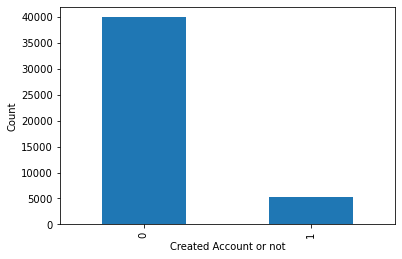

In [18]:
# Plot of Count
import matplotlib.pyplot as plt

dataframe['ifCreatedAccount'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Created Account or not')

In [19]:
import seaborn as sns

In [20]:
#obtain random numbers in order to create a tidy graph
DGraph = dataframe.sample(n = 200, random_state = 2)

d:\New folder (3)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(0.0, 100.0)]

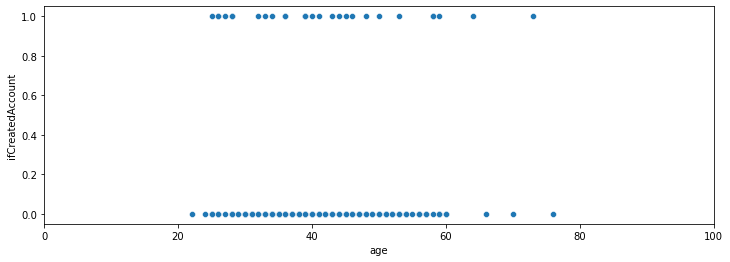

In [21]:


#customers who took fixed deposits were older than those who didn't


fig,ax = plt.subplots(figsize=(12,4))
sns.scatterplot(DGraph['age'],DGraph['ifCreatedAccount'])
ax.set(xlim=(0, 100))

d:\New folder (3)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(0.0, 1000.0)]

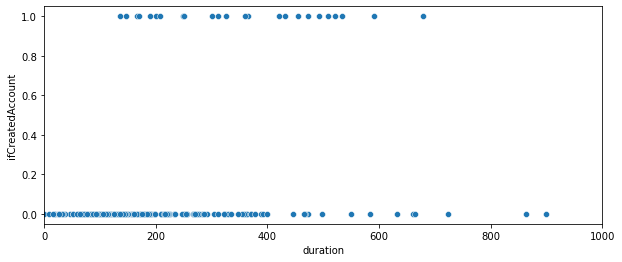

In [22]:
#the call duration vs ifCreatedAccount

fig,ax = plt.subplots(figsize=(10,4))
sns.scatterplot(DGraph['duration'],DGraph['ifCreatedAccount'])
ax.set(xlim=(0, 1000))

[(0.0, 100.0)]

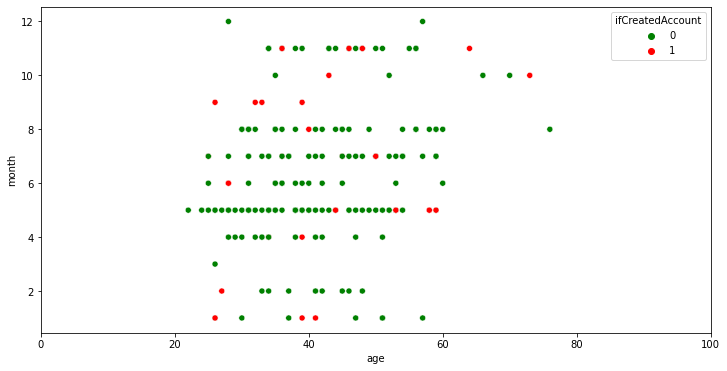

In [23]:
#using ifCreatedAccount to compare age and latest call month


fig,ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x=DGraph['age'], y=DGraph.head(200)['month'], hue=DGraph['ifCreatedAccount'],palette=['green','red'],data=DGraph)
ax.set(xlim=(0, 100))

#### Conclusion 
+ The majority of clients are between the ages of 20 and 60
+ Since August, a few additional clients who were approached have opened Fixed Deposit accounts


### Bar Graphs 

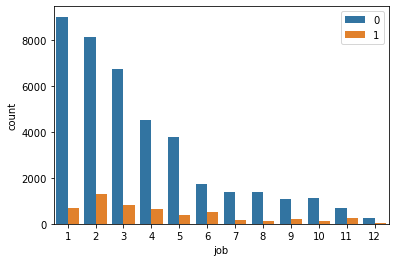

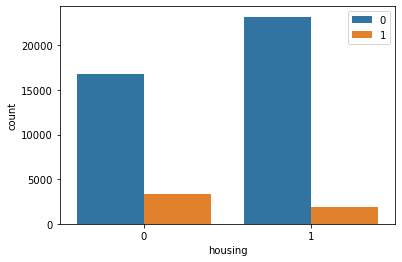

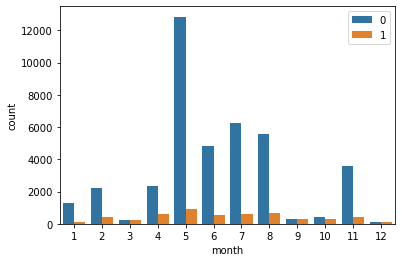

In [24]:

graphs=["job","housing", "month"]

y1 = dataframe['ifCreatedAccount']
y1 = y1.values



for i in graphs:
    
    sns.countplot(x=i, hue=y1, data=dataframe)
    plt.show()

### Conclusion 
+ Customers who did not have house loans are more likely to have fixed deposits.
+ It's a better time to contact consumers about fixed deposits in May.
+ Fixed deposits have been accepted by a growing number of consumers in the management sector.


### Creating Models

In [25]:

#Independent and Dependent features

X=dataframe.iloc[:,:-1]
y=dataframe.iloc[:,-1]

In [26]:
X.head()

,age,job,housing,month,duration,pdays,previous
0,58,2,1,5,261,-1,0
1,44,3,1,5,151,-1,0
2,33,8,1,5,76,-1,0
3,47,1,1,5,92,-1,0
4,33,12,0,5,198,-1,0


In [27]:
y.tail()

45206    1
45207    1
45208    1
45209    0
45210    0
Name: ifCreatedAccount, dtype: int64

### Split to train and test data

In [28]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

#### Random Forest Classifier

In [30]:
# Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
RFclassifier=RandomForestClassifier()
RFclassifier.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
# Prediction
y_pred=RFclassifier.predict(X_test)

In [32]:
# Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8897817752875258

In [33]:
# Create a Pickle file for Random Forest Classifier utilizing serialization.
import pickle
pickle_out = open("FD-RandomForestclassifier.pkl","wb")
pickle.dump(RFclassifier, pickle_out)
pickle_out.close()

#### Gaussian Naive Bayes Classifier

In [34]:
#Implement Gaussian Naive Bayes classifier

from sklearn.naive_bayes import GaussianNB

NBclassifier = GaussianNB()
NBclassifier.fit(X_train,y_train)


GaussianNB()

In [35]:
NBy_pred=NBclassifier.predict(X_test)

In [36]:
#checking accuracy
NBscore=accuracy_score(y_test,NBy_pred)
NBscore

0.8818195222648186

#### Decision Tree Classifier

In [37]:
#Implement Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier

DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
DTy_pred=DTclassifier.predict(X_test)

In [39]:
#checking accuracy
DTscore=accuracy_score(y_test,DTy_pred)
DTscore

0.8571955175464465

In [40]:
DT_pickle_out = open("FD-DecisionTreeClassifier.pkl","wb")
pickle.dump(DTclassifier, DT_pickle_out)
DT_pickle_out.close()

#### KNN Classifier

In [41]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
KNNy_pred=KNNclassifier.predict(X_test)

In [43]:
#checking accuracy
KNNscore=accuracy_score(y_test,KNNy_pred)
KNNscore

0.884473606605721

In [44]:
KNN_pickle_out = open("FD-KNNClassifier.pkl","wb")
pickle.dump(KNNclassifier, KNN_pickle_out)
KNN_pickle_out.close()